# Assignment 4
## Kaggle: Telco Customer Churn.

In [1]:
#imports
import pandas as pd
#!pip install plotly
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset

In [2]:
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [3]:
#number of rows and columns
data.shape

(7043, 21)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [5]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
#dataset columns
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## 1.Demographic

### a. Which 2 demographics have proven to be the most popular with the telco brand?
### b.If the marketing team wanted to increase customer retention, to whom should they targettheir advertisements to?

In [7]:
#demographics can be represented by gender, SeniorCitizen, Partner,  and Dependents columns
demographics = data[['customerID','gender', 'SeniorCitizen', 'Partner', 'Dependents','Churn']]
demographics

,customerID,gender,SeniorCitizen,Partner,Dependents,Churn
0,7590-VHVEG,Female,0,Yes,No,No
1,5575-GNVDE,Male,0,No,No,No
2,3668-QPYBK,Male,0,No,No,Yes
3,7795-CFOCW,Male,0,No,No,No
4,9237-HQITU,Female,0,No,No,Yes
...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,No
7039,2234-XADUH,Female,0,Yes,Yes,No
7040,4801-JZAZL,Female,0,Yes,Yes,No
7041,8361-LTMKD,Male,1,Yes,No,Yes


Text(0.5, 1.0, 'Churn by Gender')

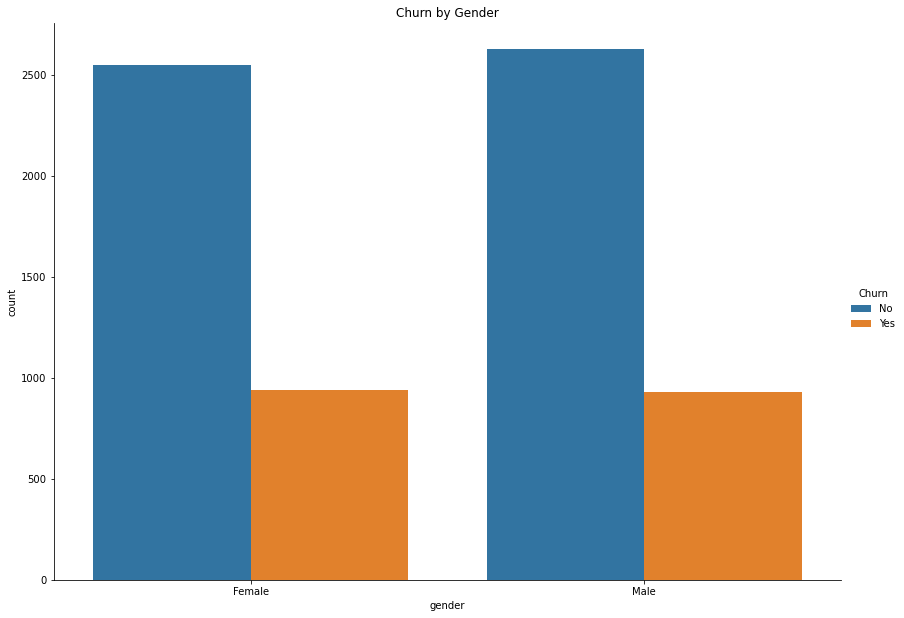

In [8]:
#Gender
axs=sns.catplot(x="gender", hue="Churn", data=demographics, kind='count',height=8.27, aspect=11.7/8.27)
plt.title ('Churn by Gender')


For both Male and Female there seems to be no major difference in the Churn 

Text(0.5, 1.0, 'Churn by Senior Citizen')

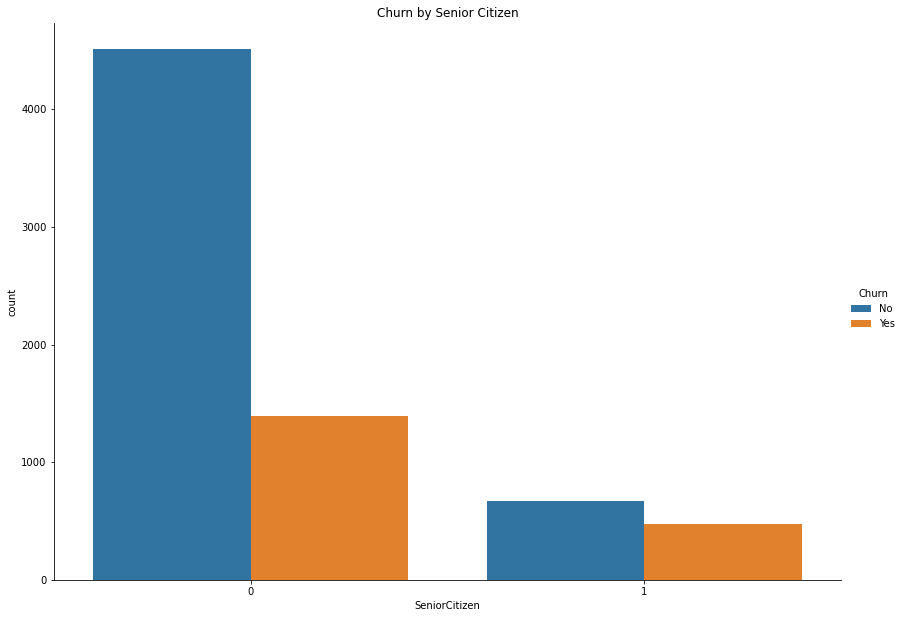

In [9]:
#Senior Citizen
ax1=sns.catplot(x="SeniorCitizen", hue="Churn", data=demographics, kind='count',height=8.27, aspect=11.7/8.27)
plt.title ('Churn by Senior Citizen')

The number of none senior citizens is higher than senior citizens. The churn rate in older customers ,i.e. senior citizens, is higher than in younger customers.


Text(0.5, 1.0, 'Churn by Partner')

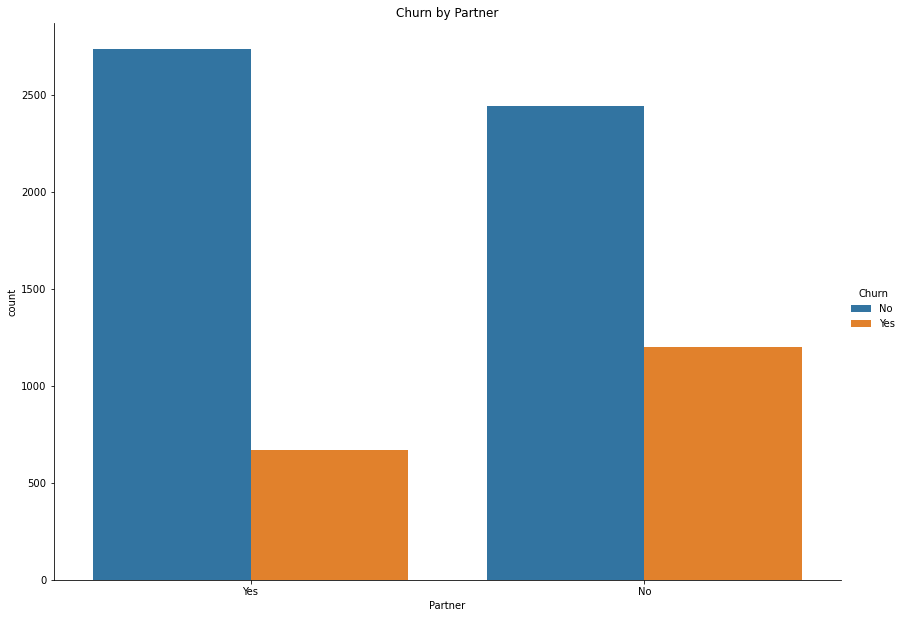

In [10]:
#Partner
ax1=sns.catplot(x="Partner", hue="Churn", data=demographics, kind='count',height=8.27, aspect=11.7/8.27)
plt.title ('Churn by Partner')

Churn is slightly higher in customers without partners

Text(0.5, 1.0, 'Churn by Dependents')

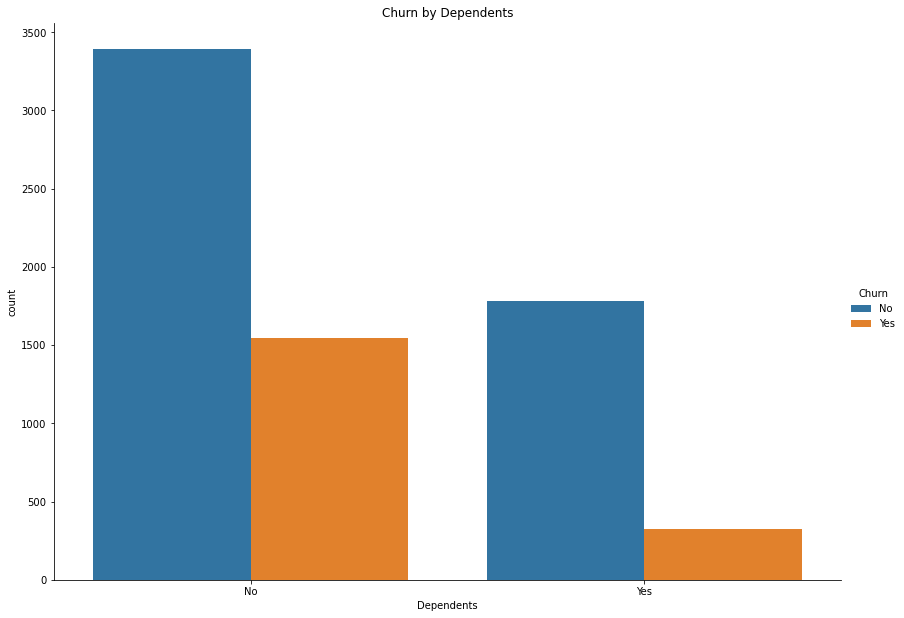

In [11]:
#Dependents
ax1=sns.catplot(x="Dependents", hue="Churn", data=demographics, kind='count',height=8.27, aspect=11.7/8.27)
plt.title ('Churn by Dependents')

Majority of the customer base have no dependents. the percentage of customers who churn is more in those with dependents than in those without.

#### a. The most popular demographics are dependents and Senior Citizen which is an indication of age as they have a significant impact on age.
#### b. The marketing team should target their advertisements on senior citizens and on customers without dependents to increase customer retention. 

## Services

### a. Which 3 services  are  contributing  to  a  higher  monthly  charge  and  resulting  to customers churning?(Use visualizations in explaining your analysis

In [33]:
df_services = data[['PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'MonthlyCharges']]
df_services

,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MonthlyCharges
0,No,No phone service,DSL,No,Yes,No,No,No,No,29.85
1,Yes,No,DSL,Yes,No,Yes,No,No,No,56.95
2,Yes,No,DSL,Yes,Yes,No,No,No,No,53.85
3,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,42.30
4,Yes,No,Fiber optic,No,No,No,No,No,No,70.70
...,...,...,...,...,...,...,...,...,...,...
7038,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,84.80
7039,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,103.20
7040,No,No phone service,DSL,Yes,No,No,No,No,No,29.60
7041,Yes,Yes,Fiber optic,No,No,No,No,No,No,74.40


In [38]:
#changing service variables to be categorical
services=['PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies']
df_services[services]=df_services[services].astype('category')
df_services.dtypes


/anaconda/envs/azureml_py36/lib/python3.6/site-packages/pandas/core/frame.py:3509: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
MonthlyCharges       float64
dtype: object

In [43]:
#encoding service variables
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

for i in services: 
    df_services[i] = labelencoder.fit_transform(df_services[i])
df_services

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MonthlyCharges
0,0,1,0,0,2,0,0,0,0,29.85
1,1,0,0,2,0,2,0,0,0,56.95
2,1,0,0,2,2,0,0,0,0,53.85
3,0,1,0,2,0,2,2,0,0,42.30
4,1,0,1,0,0,0,0,0,0,70.70
...,...,...,...,...,...,...,...,...,...,...
7038,1,2,0,2,0,2,2,2,2,84.80
7039,1,2,1,0,2,2,0,2,2,103.20
7040,0,1,0,2,0,0,0,0,0,29.60
7041,1,2,1,0,0,0,0,0,0,74.40


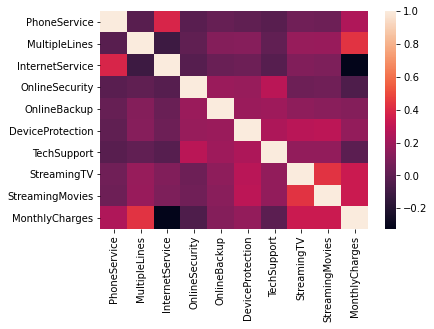

In [45]:
sns.heatmap(df_services.corr());

In [46]:
df_services.corr()

,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MonthlyCharges
PhoneService,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.247398
MultipleLines,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.433576
InternetService,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,-0.323260
OnlineSecurity,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,-0.053878
OnlineBackup,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.119777
DeviceProtection,0.003727,0.122318,0.044944,0.175985,0.187757,1.000000,0.240593,0.276652,0.288799,0.163652
TechSupport,-0.019158,0.011466,-0.026047,0.285028,0.195748,0.240593,1.000000,0.161305,0.161316,-0.008682
StreamingTV,0.055353,0.175059,0.107417,0.044669,0.147186,0.276652,0.161305,1.000000,0.434772,0.336706
StreamingMovies,0.043870,0.180957,0.098350,0.055954,0.136722,0.288799,0.161316,0.434772,1.000000,0.335459
MonthlyCharges,0.247398,0.433576,-0.323260,-0.053878,0.119777,0.163652,-0.008682,0.336706,0.335459,1.000000


In [ ]:
The 3 services are Multiple Lines, Streaming TV and Streaming Movies

### b. If  the  telco  was  to  offer  Phone  as  a standaloneservice,  which type  of  contract would encourage customer retention?

In [52]:
pd.crosstab(data['Contract'],data['Churn'])

Churn,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


Month-to Month Contract

## Payment

### a.If  the  company  was  to streamline  all  its  services  into  3  bouquet packages,  what monthly prices will be appropriate for the following packages to keep customers from churning:
* Basic
* Plus
* Premium

In [54]:
data['MonthlyCharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9cdd25fa58>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9cdc9a1518>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9cdd1b5c18>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9cdc605cc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9cd6ab5f60>],
 'means': []}

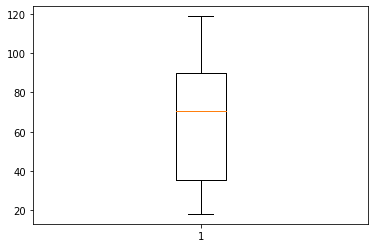

In [57]:
plt.boxplot(data['MonthlyCharges'])

* Basic 35.5
* Plus 70.35
* Premium 89.85


### b. Should the company strictly go paperless for their monthly billings as a technique of keeping their customers and why?

In [61]:
pd.crosstab(data['PaperlessBilling'],data['Churn'])

Churn,No,Yes
PaperlessBilling,,
No,2403,469
Yes,2771,1400


In [60]:
data.groupby(['PaperlessBilling','Churn'])['MonthlyCharges'].mean().reset_index()


,PaperlessBilling,Churn,MonthlyCharges
0,No,No,49.813962
1,No,Yes,63.157463
2,Yes,No,71.195525
3,Yes,Yes,78.221429


In [ ]:
No since  the probability of the customer churning is